# DWT VAE Experimentation


In [1]:
%load_ext autoreload

%autoreload 2

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt

import plotly
plotly.offline.init_notebook_mode()

# Import VAEs and utilities
from utils import *
from experiments import *

Using slow nslr


In [3]:
dload = './model_dir'

## 1. Load data and preprocess

In [ ]:
X_train, X_val, y_train, y_val = open_data(extractor='pupil', keep_nan_padding=True, objective='reg')
num_classes = len(np.unique(y_train))
base = np.min(y_train)  # Check if data is 0-based
if base != 0:
    y_train -= base
y_val -= base

analying pupil
config 
analying ripa
config 
analying pupil+ripa
config 


In [5]:
# Interpolate blinks in the dataset
X_train_interpolated = akima_interpolate_zeros(X_train, pad_value=np.nan)
X_val_interpolated = akima_interpolate_zeros(X_val, pad_value=np.nan)
X_train_interpolated = X_train_interpolated.astype(np.float32)
X_val_interpolated = X_val_interpolated.astype(np.float32)
X_train.shape


(150, 17351, 2)

Sample with minimum length: idx=63, length=1257


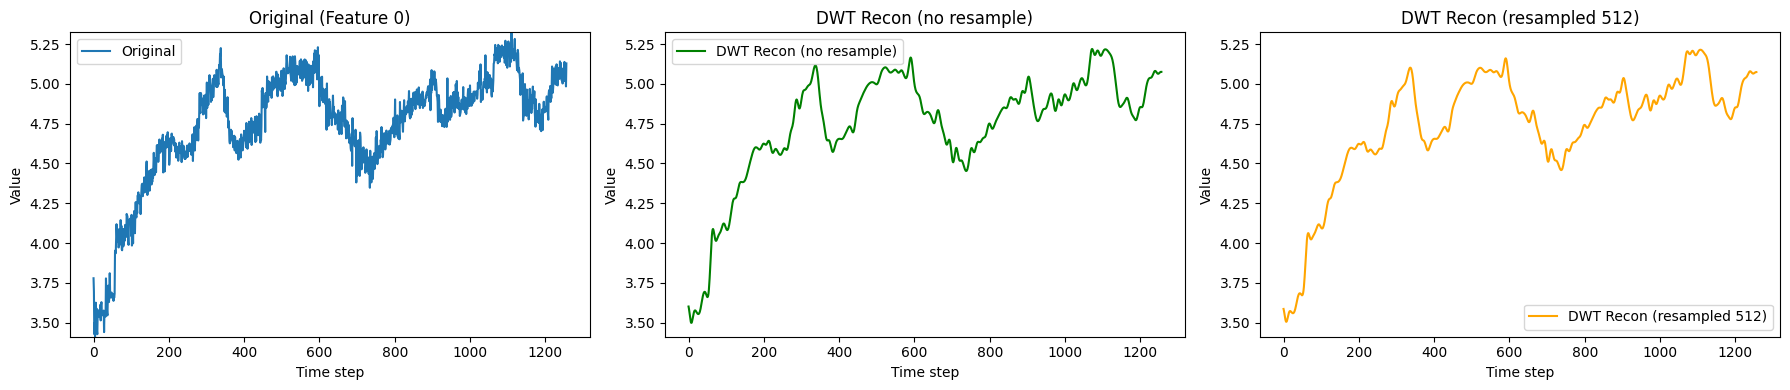

Sample with maximum length: idx=116, length=15892


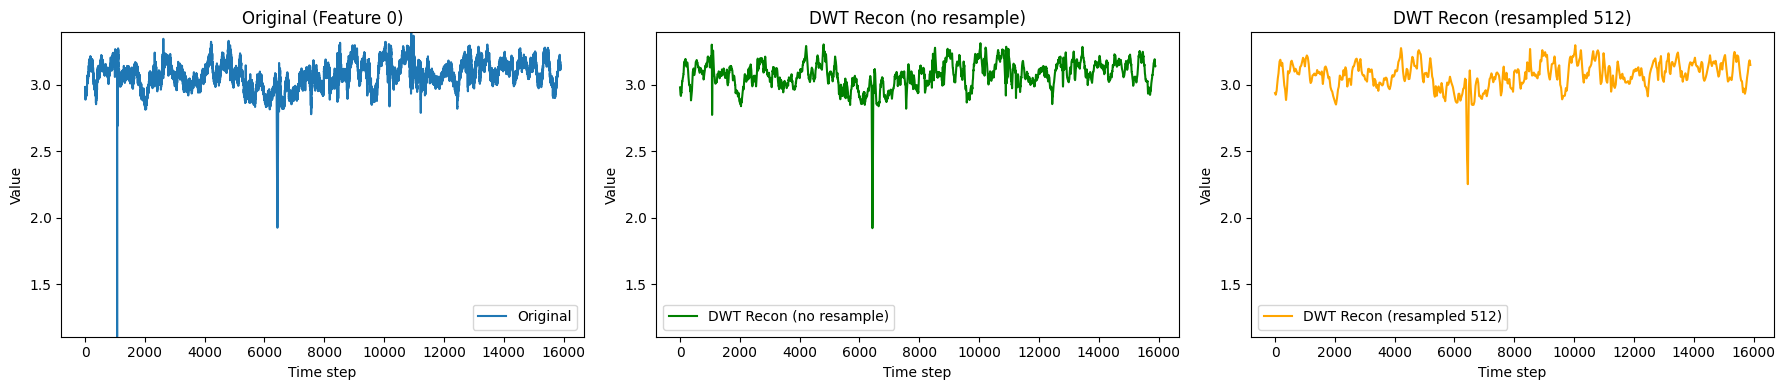

In [6]:
# Find sequence lengths (ignoring NaN-padded rows)
seq_lengths = [np.sum(~np.isnan(seq).any(axis=1)) for seq in X_train_interpolated]
min_idx = np.argmin(seq_lengths)
max_idx = np.argmax(seq_lengths)

# Plot for minimum length sample
sequence_min = X_train_interpolated[min_idx, :]
print(f"Sample with minimum length: idx={min_idx}, length={seq_lengths[min_idx]}")
dwt_resample_reconstruct_plot(sequence_min, feature_idx=0, wavelet='sym16', level=3, fixed_cA_len=512)

# Plot for maximum length sample
sequence_max = X_train_interpolated[max_idx, :]
print(f"Sample with maximum length: idx={max_idx}, length={seq_lengths[max_idx]}")
dwt_resample_reconstruct_plot(sequence_max, feature_idx=0, wavelet='sym16', level=3, fixed_cA_len=512)

## 2. Training Models


                    VAE TRAINING EXPERIMENTS

────────────────────────────────────────────────────────────────────────────────
[1/12] Training VAE with none annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 8.9358 | Recon: 8.5231 | KL: 412.7069
Epoch   10/1000 | Loss: 2.1266 | Recon: 1.8085 | KL: 318.0423
Epoch   20/1000 | Loss: 1.0603 | Recon: 0.8332 | KL: 227.0322
Epoch   30/1000 | Loss: 0.8051 | Recon: 0.6164 | KL: 188.7413
Epoch   40/1000 | Loss: 0.5189 | Recon: 0.3644 | KL: 154.4783
Epoch   50/1000 | Loss: 0.4367 | Recon: 0.2781 | KL: 158.5777
Epoch   60/1000 | Loss: 0.3803 | Recon: 0.2456 | KL: 134.7684
Epoch   70/1000 | Loss: 0.3177 | Recon: 0.1773 | KL: 140.3682
Epoch   80/1000 | Loss: 0.2800 | Recon: 0.1410 | KL: 139.0327
Epoch   90/1000 | Loss: 0.2676 | Recon: 0.1349 | KL: 132.7411
Epoch  100/1000 | Loss: 0.2600 | Recon: 0.1324 | KL: 127.5530
Epoch  110/1000 | Loss: 0.2469 | Recon: 0.1220 | KL: 124.9022
Epoch  

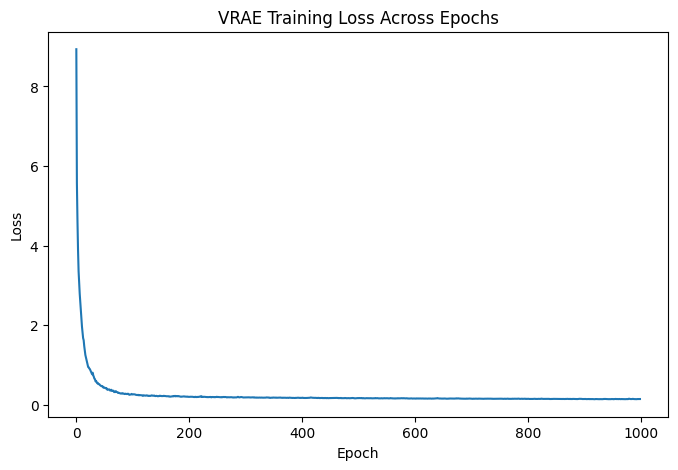

Checkpoint saved to ./model_dir/dwt_vae_none.pt
✓ Train MSE: 0.003600 | Val MSE: 0.031825


────────────────────────────────────────────────────────────────────────────────
[2/12] Training VAE with monotonic annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 11.7075 | Recon: 9.6902 | KL: 201.7236 | β=0.0100
Epoch   10/1000 | Loss: 4.5503 | Recon: 3.2637 | KL: 68.3645 | β=0.0188
Epoch   20/1000 | Loss: 3.7841 | Recon: 2.6538 | KL: 39.4933 | β=0.0286
Epoch   30/1000 | Loss: 3.4523 | Recon: 2.1998 | KL: 32.6011 | β=0.0384
Epoch   40/1000 | Loss: 3.4011 | Recon: 2.0273 | KL: 28.4905 | β=0.0482
Epoch   50/1000 | Loss: 3.4100 | Recon: 1.9244 | KL: 25.6057 | β=0.0580
Epoch   60/1000 | Loss: 3.5735 | Recon: 1.9957 | KL: 23.2652 | β=0.0678
Epoch   70/1000 | Loss: 3.7029 | Recon: 2.0324 | KL: 21.5212 | β=0.0776
Epoch   80/1000 | Loss: 3.7624 | Recon: 2.1918 | KL: 17.9657 | β=0.0874
Epoch   90/1000 | Loss: 3.7957 | Recon: 2.1539 | KL

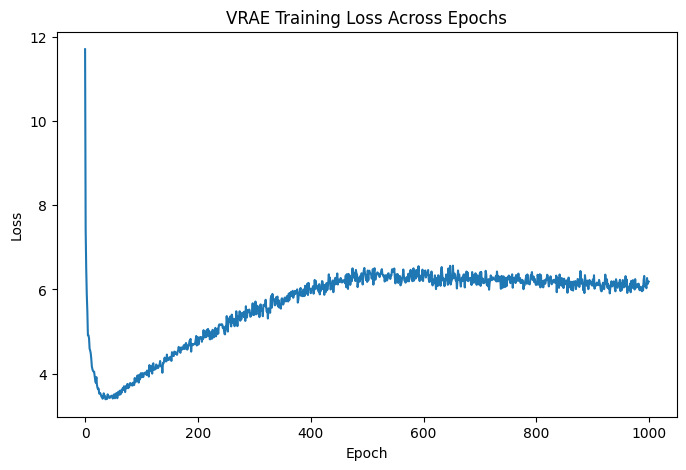

Checkpoint saved to ./model_dir/dwt_vae_monotonic.pt
✓ Train MSE: 0.251956 | Val MSE: 0.055515


────────────────────────────────────────────────────────────────────────────────
[3/12] Training VAE with cyclic annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 12.1395 | Recon: 9.2471 | KL: 289.2377 | β=0.0100
Epoch   10/1000 | Loss: 5.3341 | Recon: 3.7461 | KL: 43.4268 | β=0.0366
Epoch   20/1000 | Loss: 5.1347 | Recon: 3.6661 | KL: 22.2217 | β=0.0661
Epoch   30/1000 | Loss: 5.0613 | Recon: 3.7500 | KL: 13.7166 | β=0.0956
Epoch   40/1000 | Loss: 5.2816 | Recon: 3.7154 | KL: 12.5178 | β=0.1251
Epoch   50/1000 | Loss: 5.4364 | Recon: 3.7129 | KL: 11.1456 | β=0.1546
Epoch   60/1000 | Loss: 5.4245 | Recon: 3.7329 | KL: 9.1854 | β=0.1842
Epoch   70/1000 | Loss: 5.6221 | Recon: 4.0577 | KL: 7.3215 | β=0.2137
Epoch   80/1000 | Loss: 5.7607 | Recon: 4.1950 | KL: 6.4383 | β=0.2432
Epoch   90/1000 | Loss: 5.8647 | Recon: 4.3346 | KL:

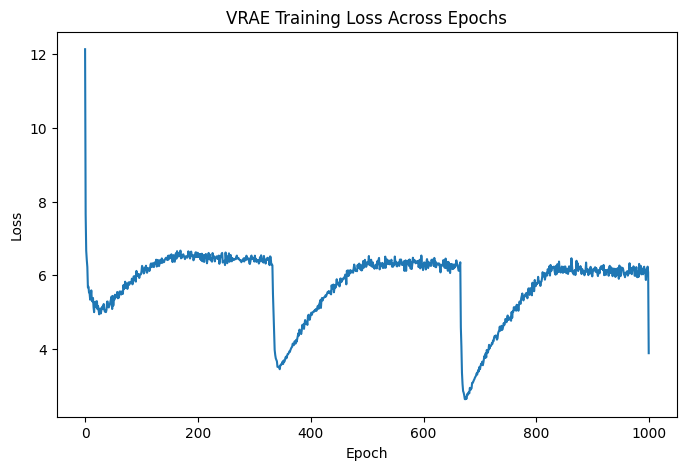

Checkpoint saved to ./model_dir/dwt_vae_cyclic.pt
✓ Train MSE: 0.165313 | Val MSE: 0.050345


────────────────────────────────────────────────────────────────────────────────
[4/12] Training VAER with none annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 2053.5811 | R: 14.5592 | KL: 1536.0389 | Reg: 502.9831
Epoch   10/1000 | Loss: 12.3979 | R: 7.1060 | KL: 4.6461 | Reg: 0.6458
Epoch   20/1000 | Loss: 7.8835 | R: 6.8752 | KL: 1.0913 | Reg: -0.0830
Epoch   30/1000 | Loss: 7.1473 | R: 6.7564 | KL: 0.4728 | Reg: -0.0819
Epoch   40/1000 | Loss: 8.7231 | R: 6.7961 | KL: 0.5314 | Reg: 1.3956
Epoch   50/1000 | Loss: 6.4152 | R: 6.8273 | KL: 0.3063 | Reg: -0.7184
Epoch   60/1000 | Loss: 6.1617 | R: 6.5700 | KL: 0.3029 | Reg: -0.7112
Epoch   70/1000 | Loss: 6.8833 | R: 6.7437 | KL: 0.3675 | Reg: -0.2279
Epoch   80/1000 | Loss: 5.7516 | R: 6.6821 | KL: 0.2883 | Reg: -1.2189
Epoch   90/1000 | Loss: 6.4801 | R: 6.6849 | KL: 0.3365 |

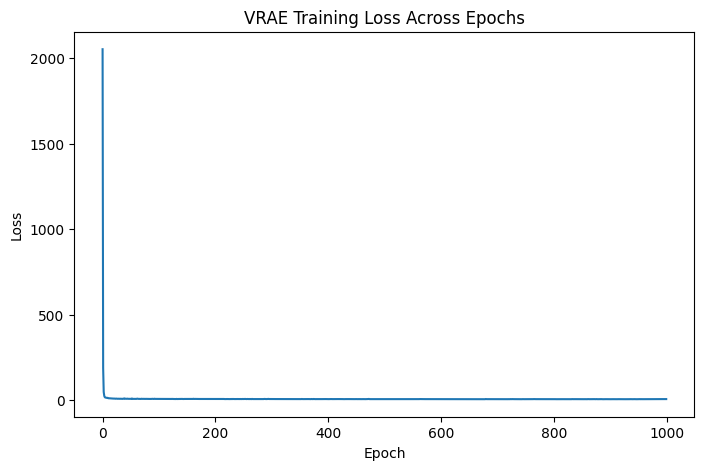

Checkpoint saved to ./model_dir/dwt_vaer_none.pt
✓ Train MSE: 0.569109 | Val MSE: 0.062327


────────────────────────────────────────────────────────────────────────────────
[5/12] Training VAER with monotonic annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 12.5941 | R: 9.4820 | KL: 302.1268 | Reg: 9.0810 | β=0.0100
Epoch   10/1000 | Loss: 4.6632 | R: 3.4519 | KL: 63.3515 | Reg: 1.0150 | β=0.0188
Epoch   20/1000 | Loss: 3.8623 | R: 2.6017 | KL: 43.6866 | Reg: 0.3622 | β=0.0286
Epoch   30/1000 | Loss: 3.4244 | R: 2.1160 | KL: 34.3413 | Reg: -0.2853 | β=0.0384
Epoch   40/1000 | Loss: 3.3375 | R: 2.0400 | KL: 27.4288 | Reg: -0.5213 | β=0.0482
Epoch   50/1000 | Loss: 3.3103 | R: 1.8517 | KL: 26.0657 | Reg: -0.9260 | β=0.0580
Epoch   60/1000 | Loss: 3.3961 | R: 1.9506 | KL: 22.2100 | Reg: -0.8954 | β=0.0678
Epoch   70/1000 | Loss: 3.5133 | R: 2.0038 | KL: 20.5796 | Reg: -1.1325 | β=0.0776
Epoch   80/1000 | Loss: 3.4655 | R: 

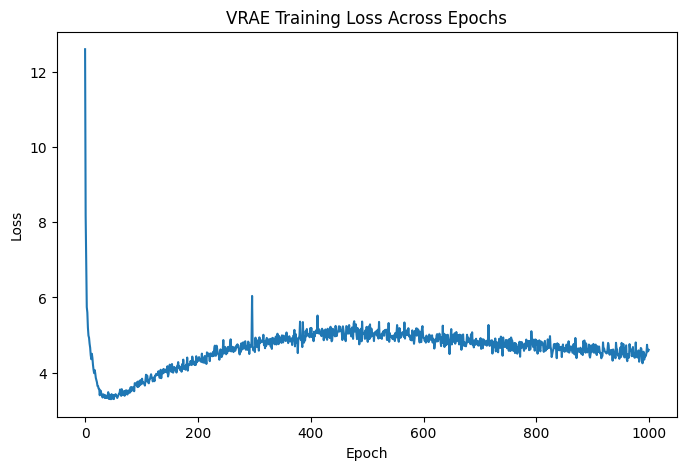

Checkpoint saved to ./model_dir/dwt_vaer_monotonic.pt
✓ Train MSE: 0.159553 | Val MSE: 0.060781


────────────────────────────────────────────────────────────────────────────────
[6/12] Training VAER with cyclic annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 11.8538 | R: 9.5224 | KL: 230.7683 | Reg: 2.3703 | β=0.0100
Epoch   10/1000 | Loss: 5.6101 | R: 3.9947 | KL: 43.8372 | Reg: 0.3418 | β=0.0366
Epoch   20/1000 | Loss: 5.0068 | R: 3.5936 | KL: 21.3925 | Reg: -0.0072 | β=0.0661
Epoch   30/1000 | Loss: 5.0183 | R: 3.6049 | KL: 15.1575 | Reg: -0.3732 | β=0.0956
Epoch   40/1000 | Loss: 5.0604 | R: 3.7150 | KL: 11.4588 | Reg: -0.7061 | β=0.1251
Epoch   50/1000 | Loss: 5.1408 | R: 3.6478 | KL: 10.7662 | Reg: -1.1113 | β=0.1546
Epoch   60/1000 | Loss: 5.2461 | R: 3.7224 | KL: 9.3686 | Reg: -1.0944 | β=0.1842
Epoch   70/1000 | Loss: 5.4108 | R: 3.9419 | KL: 8.1544 | Reg: -1.2801 | β=0.2137
Epoch   80/1000 | Loss: 5.4431 | R:

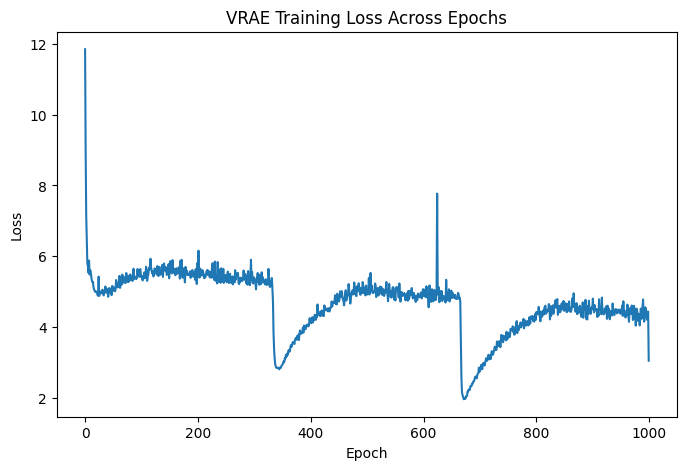

Checkpoint saved to ./model_dir/dwt_vaer_cyclic.pt
✓ Train MSE: 0.125157 | Val MSE: 0.054538


────────────────────────────────────────────────────────────────────────────────
[7/12] Training AVAER with none annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 1262.4403 | R: 11.2315 | KL: 574.7265 | Aux: -403.9441 | Reg: 272.5381
Epoch   10/1000 | Loss: 99.2064 | R: 7.6023 | KL: 37.9631 | Aux: -20.6261 | Reg: 33.0149
Epoch   20/1000 | Loss: 35.2189 | R: 7.0385 | KL: 10.4591 | Aux: -9.9700 | Reg: 7.7514
Epoch   30/1000 | Loss: 14.7633 | R: 6.8712 | KL: 1.2511 | Aux: -6.5710 | Reg: 0.0701
Epoch   40/1000 | Loss: 11.8391 | R: 6.8677 | KL: 1.0428 | Aux: -4.4769 | Reg: -0.5482
Epoch   50/1000 | Loss: 9.6155 | R: 6.6948 | KL: 0.7685 | Aux: -3.4357 | Reg: -1.2835
Epoch   60/1000 | Loss: 8.7442 | R: 6.6865 | KL: 0.5512 | Aux: -2.6180 | Reg: -1.1116
Epoch   70/1000 | Loss: 8.8406 | R: 6.7750 | KL: 1.1372 | Aux: -2.0802 | Reg: -1.1518

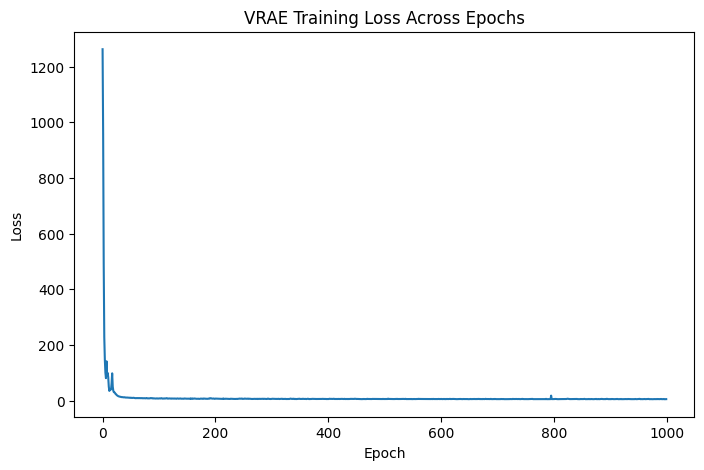

Checkpoint saved to ./model_dir/dwt_avaer_none.pt
✓ Train MSE: 0.611018 | Val MSE: 0.066955


────────────────────────────────────────────────────────────────────────────────
[8/12] Training AVAER with monotonic annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 14.1273 | R: 9.1930 | KL: 272.9489 | Aux: -218.0451 | Reg: 2.4392 | β=0.0100
Epoch   10/1000 | Loss: 5.3085 | R: 3.6864 | KL: 58.7696 | Aux: -24.9152 | Reg: 2.5024 | β=0.0188
Epoch   20/1000 | Loss: 4.0930 | R: 2.5251 | KL: 45.0630 | Aux: -7.1273 | Reg: 2.5929 | β=0.0286
Epoch   30/1000 | Loss: 3.9485 | R: 2.2628 | KL: 34.1259 | Aux: -7.5841 | Reg: 2.1648 | β=0.0384
Epoch   40/1000 | Loss: 3.9725 | R: 2.2796 | KL: 28.8570 | Aux: -6.7462 | Reg: -0.4967 | β=0.0482
Epoch   50/1000 | Loss: 3.8214 | R: 2.0341 | KL: 25.1019 | Aux: -5.8776 | Reg: -0.1745 | β=0.0580
Epoch   60/1000 | Loss: 4.0352 | R: 2.0589 | KL: 24.5525 | Aux: -5.3230 | Reg: -0.7345 | β=0.0678
Epoch   70

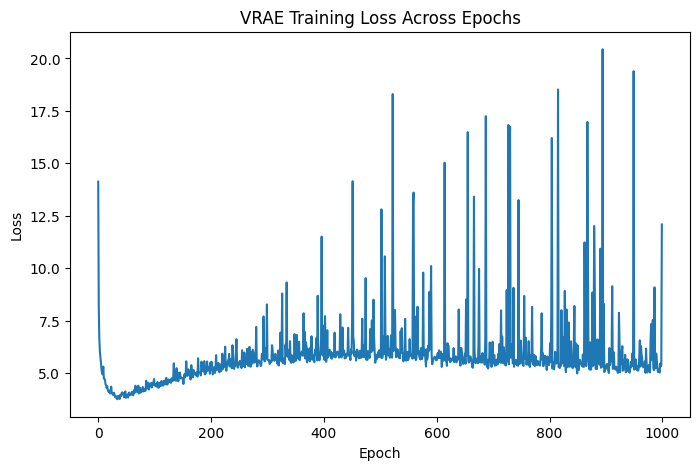

Checkpoint saved to ./model_dir/dwt_avaer_monotonic.pt
✓ Train MSE: 0.671759 | Val MSE: 0.076104


────────────────────────────────────────────────────────────────────────────────
[9/12] Training AVAER with cyclic annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 14.2228 | R: 10.9284 | KL: 191.7097 | Aux: -135.3379 | Reg: 2.3927 | β=0.0100
Epoch   10/1000 | Loss: 5.6926 | R: 3.7039 | KL: 37.8296 | Aux: -14.0537 | Reg: 2.5022 | β=0.0366
Epoch   20/1000 | Loss: 5.8698 | R: 3.6238 | KL: 24.3184 | Aux: -7.5705 | Reg: 2.0990 | β=0.0661
Epoch   30/1000 | Loss: 5.7819 | R: 3.5830 | KL: 16.6989 | Aux: -6.3490 | Reg: -0.0477 | β=0.0956
Epoch   40/1000 | Loss: 6.0582 | R: 3.8537 | KL: 12.3138 | Aux: -5.4692 | Reg: -0.1644 | β=0.1251
Epoch   50/1000 | Loss: 6.0513 | R: 3.5452 | KL: 13.1541 | Aux: -4.0387 | Reg: -0.9865 | β=0.1546
Epoch   60/1000 | Loss: 6.4188 | R: 4.1242 | KL: 9.4471 | Aux: -3.8408 | Reg: -0.8277 | β=0.1842
Epoch  

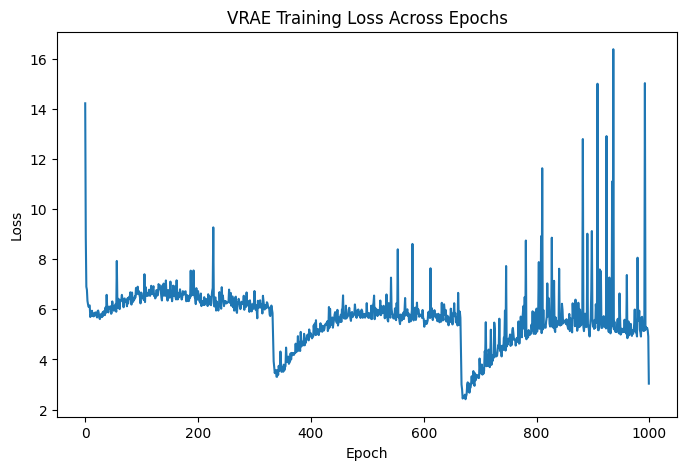

Checkpoint saved to ./model_dir/dwt_avaer_cyclic.pt
✓ Train MSE: 0.488450 | Val MSE: 0.074118


────────────────────────────────────────────────────────────────────────────────
[10/12] Training AVAE with none annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 691.2768 | Recon: 10.5117 | KL: 394.0257 | Aux: -286.7394
Epoch   10/1000 | Loss: 18.7606 | Recon: 6.9750 | KL: 3.4075 | Aux: -8.3781
Epoch   20/1000 | Loss: 17.1300 | Recon: 6.8556 | KL: 2.2642 | Aux: -8.0101
Epoch   30/1000 | Loss: 16.2577 | Recon: 6.8453 | KL: 1.4225 | Aux: -7.9899
Epoch   40/1000 | Loss: 16.3188 | Recon: 6.8970 | KL: 1.4292 | Aux: -7.9926
Epoch   50/1000 | Loss: 16.1417 | Recon: 6.6961 | KL: 1.4465 | Aux: -7.9991
Epoch   60/1000 | Loss: 16.1170 | Recon: 6.7120 | KL: 1.3914 | Aux: -8.0136
Epoch   70/1000 | Loss: 16.0174 | Recon: 6.5857 | KL: 1.4334 | Aux: -7.9982
Epoch   80/1000 | Loss: 16.0497 | Recon: 6.6657 | KL: 1.3880 | Aux: -7.9960
Epoch   90

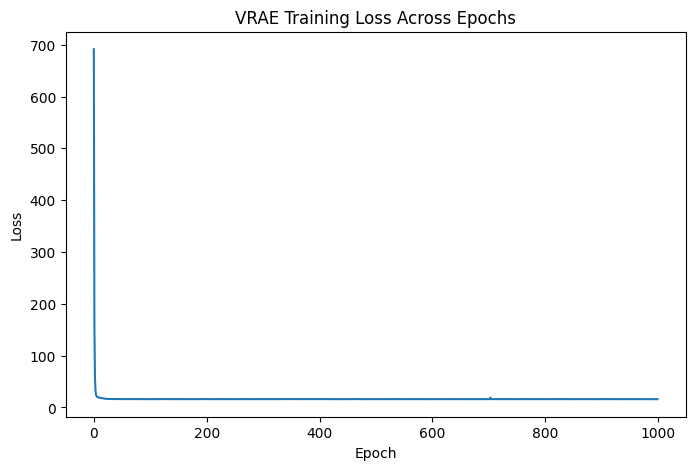

Checkpoint saved to ./model_dir/dwt_avae_none.pt
✓ Train MSE: 0.609809 | Val MSE: 0.062213


────────────────────────────────────────────────────────────────────────────────
[11/12] Training AVAE with monotonic annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 13.0755 | Recon: 9.0971 | KL: 238.8544 | Aux: -158.9908 | β=0.0100
Epoch   10/1000 | Loss: 5.0958 | Recon: 3.6480 | KL: 55.0240 | Aux: -21.9063 | β=0.0188
Epoch   20/1000 | Loss: 4.1438 | Recon: 2.9305 | KL: 34.2393 | Aux: -8.1531 | β=0.0286
Epoch   30/1000 | Loss: 3.8432 | Recon: 2.3672 | KL: 31.3081 | Aux: -7.1090 | β=0.0384
Epoch   40/1000 | Loss: 3.9711 | Recon: 2.1116 | KL: 30.6277 | Aux: -7.9355 | β=0.0482
Epoch   50/1000 | Loss: 4.1021 | Recon: 2.0148 | KL: 29.8728 | Aux: -6.1017 | β=0.0580
Epoch   60/1000 | Loss: 4.2728 | Recon: 2.3102 | KL: 22.6532 | Aux: -6.2846 | β=0.0678
Epoch   70/1000 | Loss: 4.4580 | Recon: 2.2580 | KL: 21.7757 | Aux: -6.5673 | β=0.07

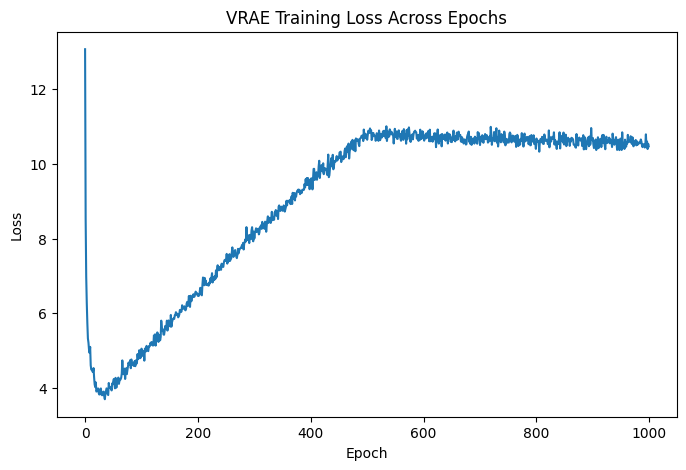

Checkpoint saved to ./model_dir/dwt_avae_monotonic.pt
✓ Train MSE: 0.389183 | Val MSE: 0.057819


────────────────────────────────────────────────────────────────────────────────
[12/12] Training AVAE with cyclic annealing
────────────────────────────────────────────────────────────────────────────────
Epoch    1/1000 | Loss: 13.2069 | Recon: 9.1943 | KL: 230.2582 | Aux: -171.0020 | β=0.0100
Epoch   10/1000 | Loss: 5.8618 | Recon: 4.0903 | KL: 33.7369 | Aux: -14.7081 | β=0.0366
Epoch   20/1000 | Loss: 5.6838 | Recon: 3.6059 | KL: 23.8463 | Aux: -7.5960 | β=0.0661
Epoch   30/1000 | Loss: 5.7833 | Recon: 3.6642 | KL: 14.8682 | Aux: -7.2972 | β=0.0956
Epoch   40/1000 | Loss: 6.3230 | Recon: 3.5360 | KL: 15.1334 | Aux: -7.1406 | β=0.1251
Epoch   50/1000 | Loss: 6.6867 | Recon: 3.9704 | KL: 10.2428 | Aux: -7.3228 | β=0.1546
Epoch   60/1000 | Loss: 7.0117 | Recon: 3.8165 | KL: 10.0191 | Aux: -7.3312 | β=0.1842
Epoch   70/1000 | Loss: 7.4840 | Recon: 4.1075 | KL: 8.3417 | Aux: -7.4606 | β=0.2

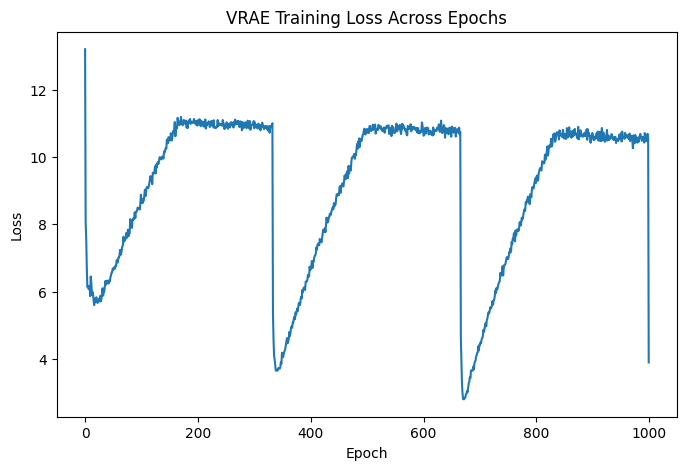

Checkpoint saved to ./model_dir/dwt_avae_cyclic.pt
✓ Train MSE: 0.292879 | Val MSE: 0.056108



In [ ]:
parameters = {
    "fixed_cA_len": 512,
    "latent_dim": 64,
    "lr": 1e-3,
    "epochs": 1000,
    "batch_size": 16,
    "wavelet": "sym16",
    "dwt_level": 3,
    "use_conv": True,
    "device": "cuda",
    "num_cycles": 3    # for cyclical annealing
}

train_results_df, val_results_df = run_all_vae_experiments(
    X_train_interpolated, X_val_interpolated, y_train, y_val, parameters, dload
)

## 3. Results

### 3.1 Reconstruction

In [ ]:
print("="*80)
print("TRAINING PERFORMANCE")
print("="*80)
display(train_results_df)

print("\n" + "="*80)
print("VALIDATION PERFORMANCE")
print("="*80)
display(val_results_df)

TRAINING PERFORMANCE


Model  Annealing       MSE         KL        Aux       Reg  \
0     VAE       none  0.003600  93.925819        NaN       NaN   
1     VAE  monotonic  0.251956   3.660723        NaN       NaN   
2     VAE     cyclic  0.165313   4.907525        NaN       NaN   
3    VAER       none  0.569109   0.574408        NaN -2.304915   
4    VAER  monotonic  0.159553   4.326120        NaN -2.377418   
5    VAER     cyclic  0.125157   8.625389        NaN -1.452527   
6   AVAER       none  0.611018  35.253124 -31.223394 -0.959497   
7   AVAER  monotonic  0.671759  34.553471 -17.731987 -1.187033   
8   AVAER     cyclic  0.488450  27.943340 -22.963146 -1.881449   
9    AVAE       none  0.609809   1.361207  -8.044914       NaN   
10   AVAE  monotonic  0.389183   4.137692  -8.196602       NaN   
11   AVAE     cyclic  0.292879   5.046767  -8.384758       NaN   

                Model_File  
0          dwt_vae_none.pt  
1     dwt_vae_monotonic.pt  
2        dwt_vae_cyclic.pt  
3         dwt_vaer_none.pt  
4    dwt_vaer_monotonic.pt  
5       dwt_vaer_cyclic.pt  
6        dwt_avaer_none.pt  
7   dwt_avaer_monotonic.pt  
8      dwt_avaer_cyclic.pt  
9         dwt_avae_none.pt  
10   dwt_avae_monotonic.pt  
11      dwt_avae_cyclic.pt


VALIDATION PERFORMANCE


Model  Annealing       MSE         KL        Aux        Reg  \
0     VAE       none  0.031825  77.080681        NaN        NaN   
1     VAE  monotonic  0.055515   2.844008        NaN        NaN   
2     VAE     cyclic  0.050345   4.123954        NaN        NaN   
3    VAER       none  0.062327   3.638242        NaN  63.571186   
4    VAER  monotonic  0.060781   8.842317        NaN  51.996838   
5    VAER     cyclic  0.054538  14.217757        NaN  63.589851   
6   AVAER       none  0.066955  38.451679 -31.443510  19.696522   
7   AVAER  monotonic  0.076104  46.162449 -18.737556  15.255734   
8   AVAER     cyclic  0.074118  38.694340 -22.766418  30.460320   
9    AVAE       none  0.062213   1.335831  -8.032333        NaN   
10   AVAE  monotonic  0.057819   3.182803  -8.111725        NaN   
11   AVAE     cyclic  0.056108   4.199273  -8.331917        NaN   

                Model_File  
0          dwt_vae_none.pt  
1     dwt_vae_monotonic.pt  
2        dwt_vae_cyclic.pt  
3         dwt_vaer_none.pt  
4    dwt_vaer_monotonic.pt  
5       dwt_vaer_cyclic.pt  
6        dwt_avaer_none.pt  
7   dwt_avaer_monotonic.pt  
8      dwt_avaer_cyclic.pt  
9         dwt_avae_none.pt  
10   dwt_avae_monotonic.pt  
11      dwt_avae_cyclic.pt

Sample 3 Reconstruction MSE: 0.049502


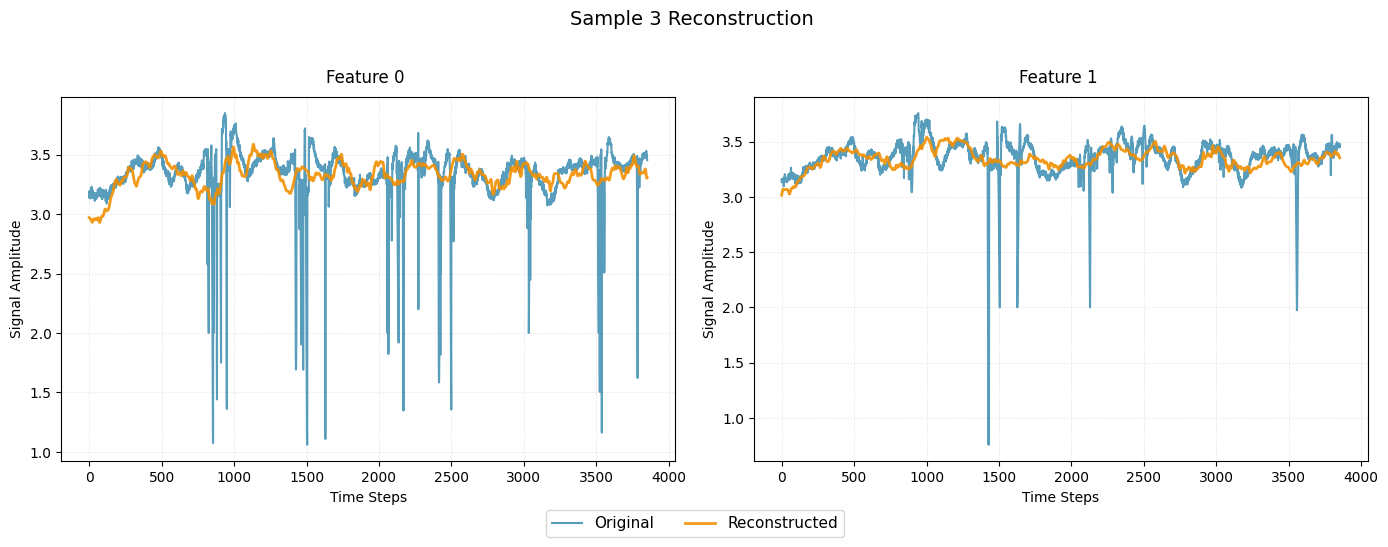

In [ ]:
# Best Reconstruction Perfrormance
vae = load_and_visualize_model(
    model_filename="dwt_vae_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

Sample 3 Reconstruction MSE: 0.064724


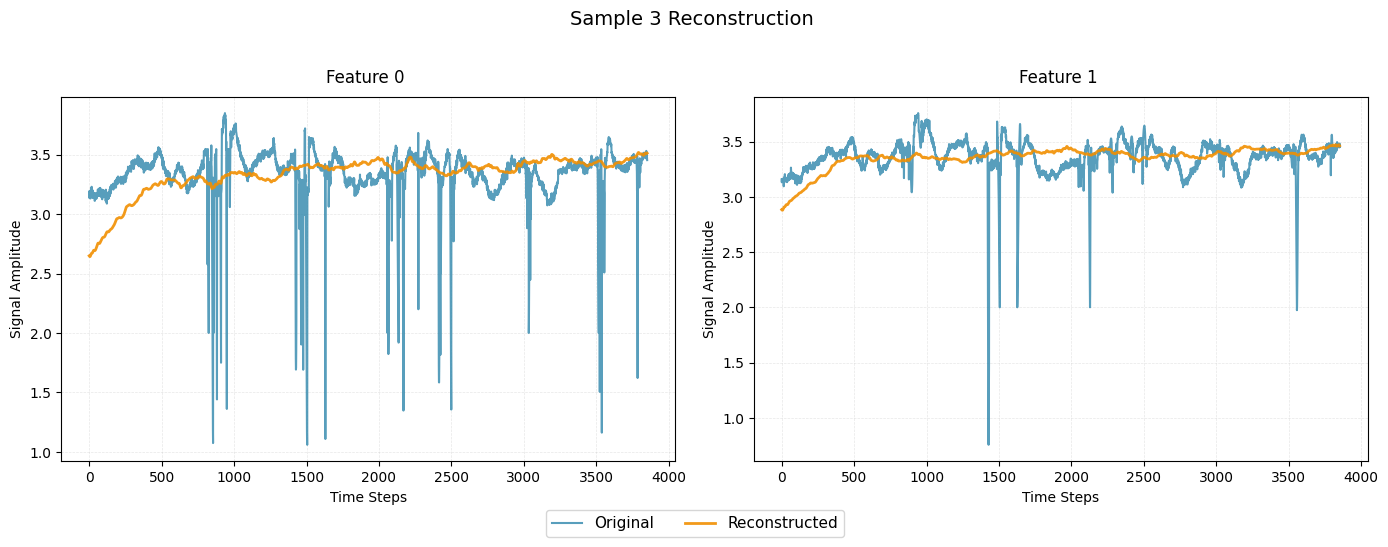

In [ ]:
# Worst Reconstruction Perfrormance
vae = load_and_visualize_model(
    model_filename="dwt_avaer_none.pt",
    X_data=X_val_interpolated,
    dload=dload,
    sample_idx=3
)

### 3.2 Latent Space

In [7]:
# Single model t-SNE visualization
X_all = np.concatenate([X_train_interpolated, X_val_interpolated], axis=0)
y_all = np.concatenate([y_train, y_val], axis=0)

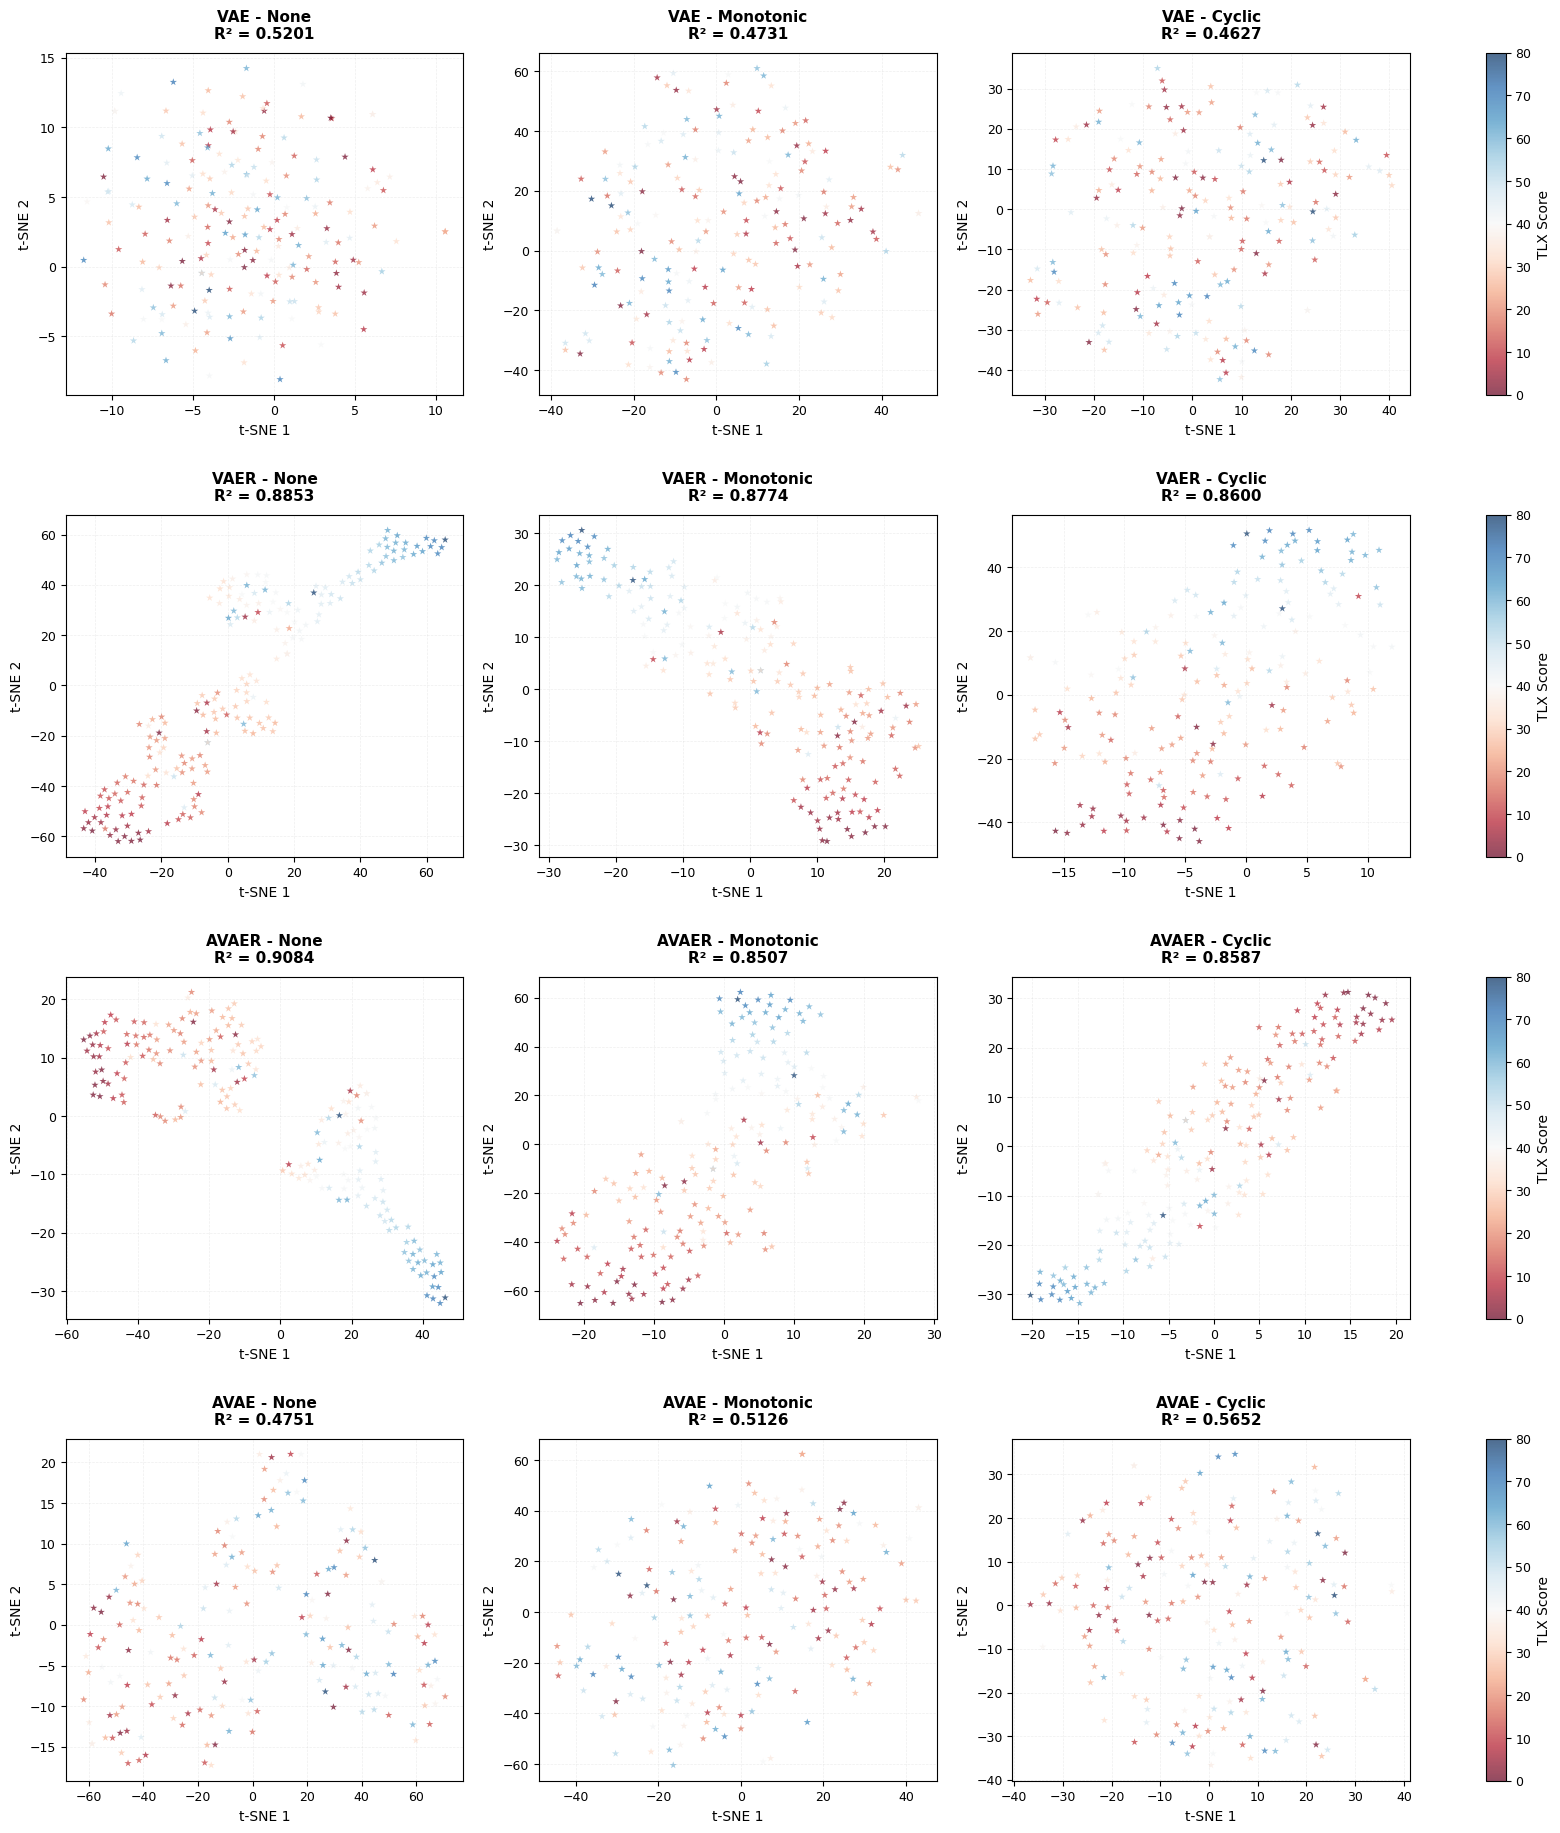

In [8]:
# All models t-SNE visualization (4x3 grid)
plot_all_models_latent_space(
    X_data=X_all,
    labels=y_all,
    dload=dload,
    perplexity=15
)

## 4. Post Analysis

### 4.1 Regression

In [15]:
# Load data for all TLX subscales
X_train_reg, X_val_reg, y_subscales_train, y_subscales_val = load_all_tlx_subscales(
    extractor='pupil', 
    keep_nan_padding=True, 
    seed=42
)

# Interpolate blinks
X_train_reg_interp = akima_interpolate_zeros(X_train_reg, pad_value=np.nan).astype(np.float32)
X_val_reg_interp = akima_interpolate_zeros(X_val_reg, pad_value=np.nan).astype(np.float32)

# Combine train and val
X_all_reg = np.concatenate([X_train_reg_interp, X_val_reg_interp], axis=0)

# Combine subscales for all data
y_all_subscales = {}
for subscale in ['mental', 'physical', 'temporal', 'performance', 'effort', 'frustration', 'mean']:
    y_all_subscales[subscale] = np.concatenate([y_subscales_train[subscale], y_subscales_val[subscale]], axis=0)

analying pupil
config 
analying ripa
config 
analying pupil+ripa
config 
analying pupil
config 
analying ripa
config 
analying pupil+ripa
config 
analying pupil
config 
analying ripa
config 
analying pupil+ripa
config 
analying pupil
config 
analying ripa
config 
analying pupil+ripa
config 
analying pupil
config 
analying ripa
config 
analying pupil+ripa
config 
analying pupil
config 
analying ripa
config 
analying pupil+ripa
config 
analying pupil
config 
analying ripa
config 
analying pupil+ripa
config 


In [6]:
# Evaluate VAE latent representations with LNSO cross-validation
lnso_results = latent_regression_lnso(
    X_all=X_all_reg, 
    y_all_subscales=y_all_subscales, 
    dload=dload,
    n_subjects=47,
    n_subjects_per_group=6,
    save_csv='regression_lnso_results.csv'
)

display(lnso_results.round(4))

Results saved to regression_lnso_results.csv


Model     Subscale     Linear     Ridge  ElasticNet  \
0   dwt_avae_cyclic.pt       mental   857.2713  647.6473    765.5282   
1   dwt_avae_cyclic.pt     physical  1103.4336  597.5530    515.7935   
2   dwt_avae_cyclic.pt     temporal  1423.8392  864.6279    788.1882   
3   dwt_avae_cyclic.pt  performance  1068.5499  582.0810    604.5046   
4   dwt_avae_cyclic.pt       effort   842.5459  652.6069    715.7094   
..                 ...          ...        ...       ...         ...   
79    dwt_vaer_none.pt     temporal  1157.7302  622.5030    615.9962   
80    dwt_vaer_none.pt  performance   809.9293  488.3755    499.8007   
81    dwt_vaer_none.pt       effort   599.3128  326.7731    319.7554   
82    dwt_vaer_none.pt  frustration   726.0502  443.2052    451.5197   
83    dwt_vaer_none.pt         mean   242.5090  138.8757    140.8526   

    Random Forest  Gradient Boosting    HistGB       SVR        XGB      LGBM  \
0        701.7677           738.9989  707.2826  800.5965   784.2081  707.6910   
1        593.3416           648.4618  606.4560  615.9564   626.3034  609.0676   
2        819.8788           896.3731  907.2830  819.5390  1103.5633  874.5753   
3        628.5619           722.7313  729.8305  645.5958   732.4468  705.1569   
4        677.9200           706.7848  732.1783  727.0279   713.0290  723.2683   
..            ...                ...       ...       ...        ...       ...   
79       698.1778           784.8607  802.1760  675.0781   816.5134  797.8014   
80       558.3561           594.2058  602.3627  533.1735   579.8308  580.6121   
81       392.5696           462.2134  484.5073  401.1231   493.5638  478.7310   
82       560.2610           678.0653  585.6895  539.1626   671.0962  579.8172   
83       169.8078           179.4324  182.3109  162.6012   210.3846  170.6057   

    CatBoost  Best Model  Best MSE  
0   723.7509       Ridge  647.6473  
1   517.0077  ElasticNet  515.7935  
2   841.2686  ElasticNet  788.1882  
3   656.0827       Ridge  582.0810  
4   698.5008       Ridge  652.6069  
..       ...         ...       ...  
79  753.0597  ElasticNet  615.9962  
80  534.1231       Ridge  488.3755  
81  453.3136  ElasticNet  319.7554  
82  590.2241       Ridge  443.2052  
83  163.7786       Ridge  138.8757  

[84 rows x 14 columns]

In [7]:
# Evaluate VAE latent representations with K-Fold cross-validation
kfold_results = latent_regression_kfold(
    X_all=X_all_reg, 
    y_all_subscales=y_all_subscales, 
    dload=dload,
    folds=5,
    random_state=42,
    save_csv='regression_kfold_results.csv'
)

display(kfold_results.round(4))

Results saved to regression_kfold_results.csv


Model     Subscale     Linear     Ridge  ElasticNet  \
0   dwt_avae_cyclic.pt       mental  1000.1844  654.5870    773.4382   
1   dwt_avae_cyclic.pt     physical  1205.7570  609.7781    508.0949   
2   dwt_avae_cyclic.pt     temporal  1593.3008  968.6446    788.6409   
3   dwt_avae_cyclic.pt  performance  1070.6002  610.1877    631.4107   
4   dwt_avae_cyclic.pt       effort   993.3513  667.8820    723.8566   
..                 ...          ...        ...       ...         ...   
79    dwt_vaer_none.pt     temporal  1193.6567  621.7899    611.7295   
80    dwt_vaer_none.pt  performance   809.7912  519.4624    506.9354   
81    dwt_vaer_none.pt       effort   691.5785  334.4847    327.5875   
82    dwt_vaer_none.pt  frustration   730.2764  453.1036    456.5549   
83    dwt_vaer_none.pt         mean   250.3697  139.0036    139.8177   

    Random Forest  Gradient Boosting     HistGB       SVR        XGB  \
0        711.5936           716.2220   815.3348  824.3800   760.8161   
1        590.6703           662.6508   668.5614  616.4902   698.6142   
2        890.9107           998.4626  1045.7676  833.1587  1045.5317   
3        685.3130           793.6971   824.4535  653.6437   807.5714   
4        687.9132           767.6228   796.0810  751.8632   780.8498   
..            ...                ...        ...       ...        ...   
79       698.5596           807.4423   747.7834  676.4224   850.0339   
80       568.2101           557.1882   599.6313  535.3278   647.1350   
81       416.7035           487.4032   517.2691  423.4224   574.8232   
82       541.0794           633.0031   614.4331  537.2953   637.8098   
83       166.7870           193.2962   182.4905  165.1504   207.3669   

         LGBM  CatBoost  Best Model  Best MSE  
0    831.5739  770.7345       Ridge  654.5870  
1    671.9971  538.7623  ElasticNet  508.0949  
2   1046.4990  880.8150  ElasticNet  788.6409  
3    851.5640  705.3721       Ridge  610.1877  
4    783.5252  735.2811       Ridge  667.8820  
..        ...       ...         ...       ...  
79   772.1728  759.6144  ElasticNet  611.7295  
80   573.1692  536.8176  ElasticNet  506.9354  
81   507.0915  479.0587  ElasticNet  327.5875  
82   603.1494  607.2449       Ridge  453.1036  
83   178.4578  171.1447       Ridge  139.0036  

[84 rows x 14 columns]

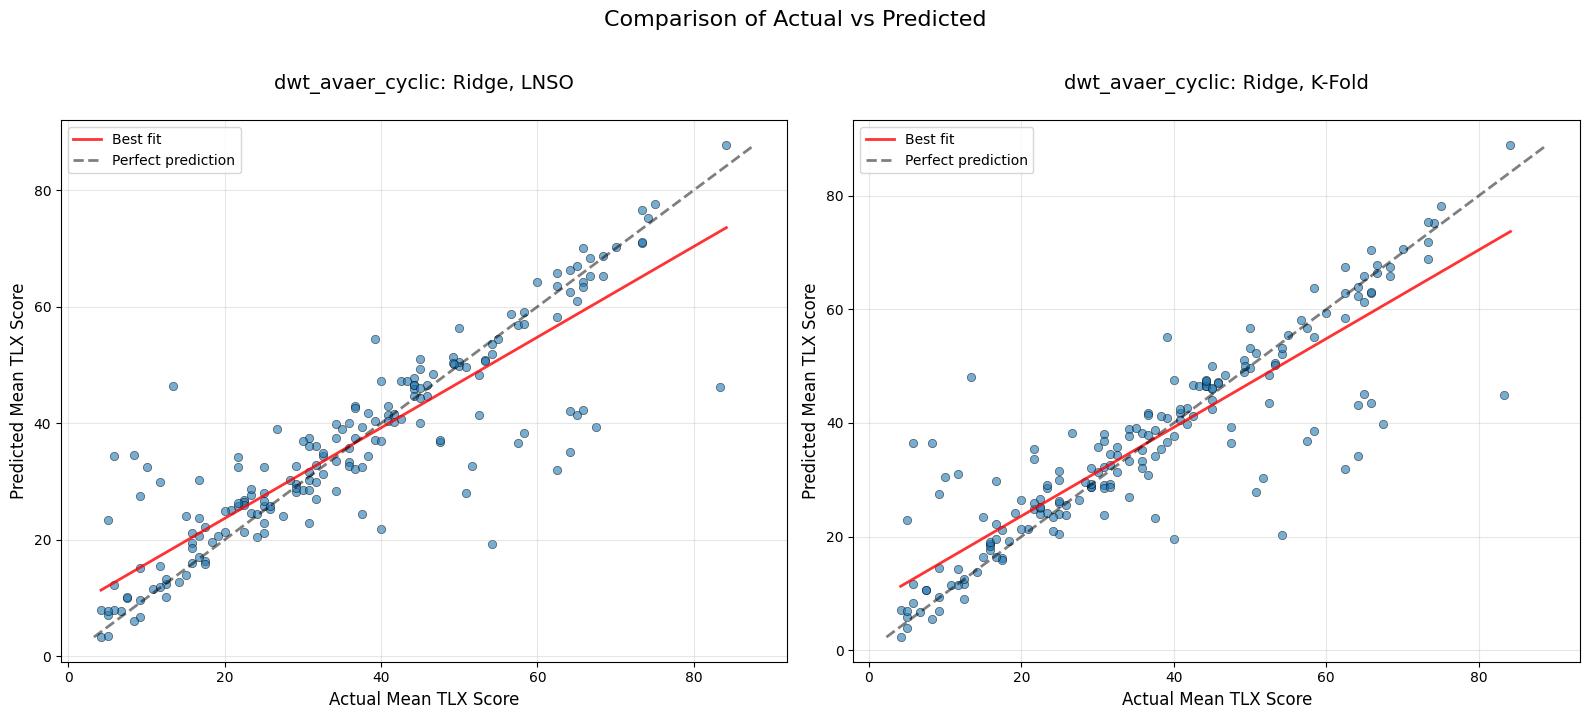

In [ ]:
plot_predicted_vs_actual_comparison(model_name='dwt_avaer_cyclic.pt', X_data=X_all, y_data=y_all_subscales['mean'], dload=dload)

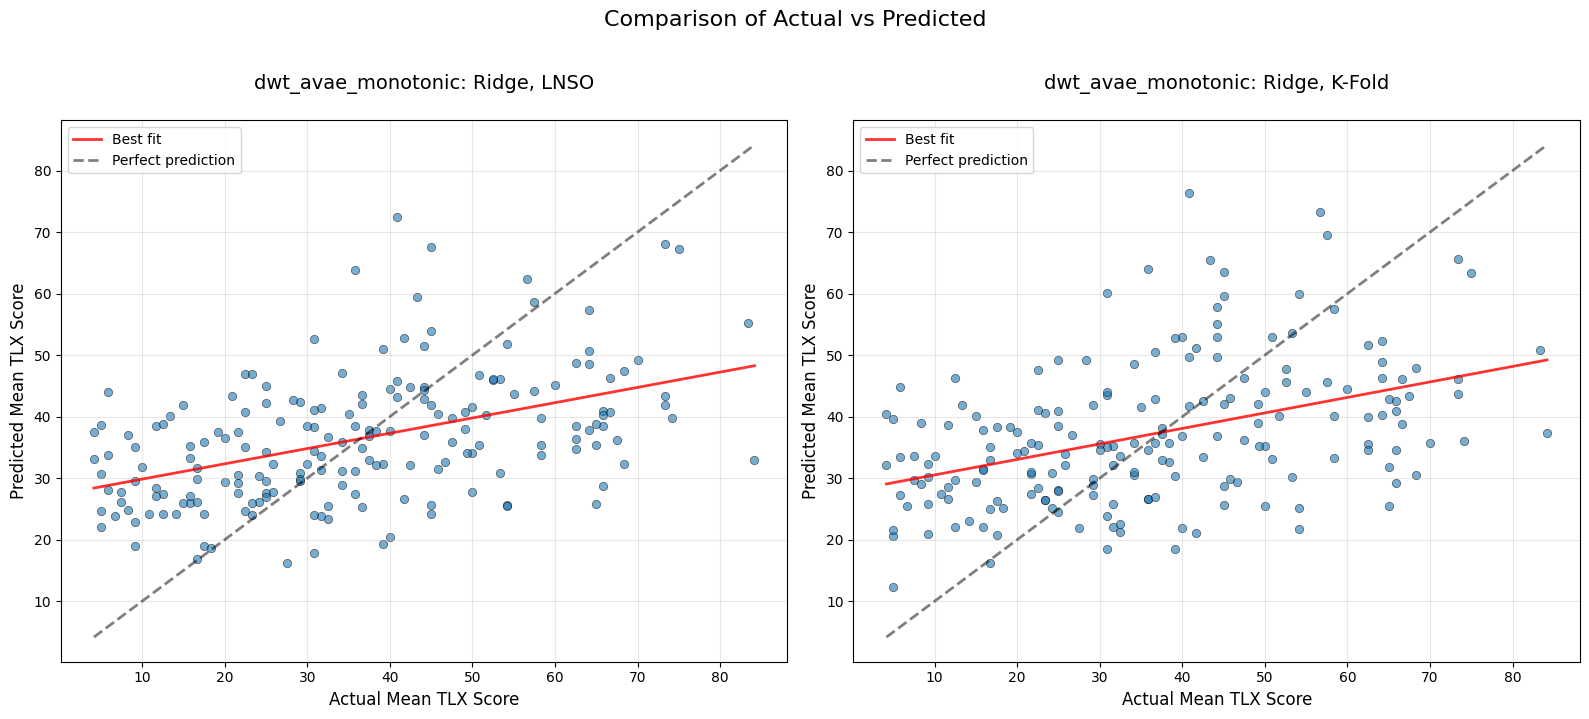

In [17]:
plot_predicted_vs_actual_comparison(model_name='dwt_avae_monotonic.pt', X_data=X_all_reg, y_data=y_all_subscales['mean'], dload=dload)

### 4.2 Classification

In [ ]:
# Load data with classification labels
X_train_cls, X_val_cls, y_train_cls, y_val_cls = open_data(extractor='pupil', keep_nan_padding=True, objective='cls')

# Combine train and val
X_all_cls = np.concatenate([akima_interpolate_zeros(X_train_cls, pad_value=np.nan).astype(np.float32), 
                            akima_interpolate_zeros(X_val_cls, pad_value=np.nan).astype(np.float32)], axis=0)
y_all_cls = np.concatenate([y_train_cls, y_val_cls], axis=0)

analying pupil
config 
analying ripa
config 
analying pupil+ripa
config 


In [ ]:
# Evaluate VAE latent representations with LNSO cross-validation
lnso_results = latent_classification_lsno(
    X_all=X_all_cls, 
    y_all=y_all_cls, 
    dload=dload,
    n_subjects_per_group=6,
    save_csv='classification_lnso_results.csv'
)

display(lnso_results.round(4))

sh: 1: nvidia-smi: not found


Results saved to: classification_lnso_results.csv


Model   Config  Logistic Regression  Decision Tree  \
0   dwt_avae_cyclic    C1vC2               0.6237         0.5982   
1   dwt_avae_cyclic    C1vC3               0.7344         0.6394   
2   dwt_avae_cyclic    C2vC3               0.8352         0.6745   
3   dwt_avae_cyclic  C1C2vC3               0.7240         0.5802   
4   dwt_avae_cyclic  C1vC2C3               0.6990         0.6646   
..              ...      ...                  ...            ...   
67    dwt_vaer_none    C1vC3               0.9439         0.9084   
68    dwt_vaer_none    C2vC3               0.9391         0.8910   
69    dwt_vaer_none  C1C2vC3               0.9396         0.8698   
70    dwt_vaer_none  C1vC2C3               0.9042         0.8823   
71    dwt_vaer_none      all               0.8510         0.8083   

    Random Forest  Gradient Boosting  HistGB     SVM  K-Nearest Neighbors  \
0          0.6746             0.6395  0.6399  0.6759               0.6223   
1          0.6671             0.6931  0.6873  0.6462               0.6699   
2          0.8167             0.8059  0.8085  0.8419               0.8249   
3          0.6604             0.6521  0.6500  0.6677               0.6302   
4          0.6625             0.6542  0.6583  0.6594               0.6875   
..            ...                ...     ...     ...                  ...   
67         0.9382             0.9200  0.9147  0.9442               0.9442   
68         0.9469             0.9083  0.9239  0.9469               0.9469   
69         0.9240             0.9125  0.9083  0.9396               0.9292   
70         0.8938             0.8781  0.8990  0.9198               0.8990   
71         0.8771             0.8448  0.8510  0.8667               0.8719   

    Naive Bayes     XGB    LGBM  CatBoost           Best Model  Best Accuracy  
0        0.6080  0.6248  0.6161    0.6699                  SVM         0.6759  
1        0.6415  0.7045  0.6619    0.6316  Logistic Regression         0.7344  
2        0.7110  0.7769  0.8092    0.8323                  SVM         0.8419  
3        0.6260  0.6698  0.6688    0.6552  Logistic Regression         0.7240  
4        0.6031  0.6646  0.6479    0.6688  Logistic Regression         0.6990  
..          ...     ...     ...       ...                  ...            ...  
67       0.9567  0.9266  0.9075    0.9323          Naive Bayes         0.9567  
68       0.8384  0.9317  0.9394    0.9391        Random Forest         0.9469  
69       0.9292  0.9073  0.9125    0.9177  Logistic Regression         0.9396  
70       0.8677  0.8833  0.8938    0.8990                  SVM         0.9198  
71       0.8240  0.8448  0.8448    0.8510        Random Forest         0.8771  

[72 rows x 15 columns]

In [7]:
# Evaluate VAE latent representations with K-fold cross-validation
kfold_results = latent_classification_kfold(
    X_all=X_all_cls, 
    y_all=y_all_cls, 
    dload=dload,
    folds=5,
    random_state=42,
    save_csv='classification_kfold_results.csv'
)

display(kfold_results.round(4))

Results saved to: classification_kfold_results.csv


Model   Config  Logistic Regression  Decision Tree  \
0   dwt_avae_cyclic    C1vC2               0.6325         0.5425   
1   dwt_avae_cyclic    C1vC3               0.7103         0.6745   
2   dwt_avae_cyclic    C2vC3               0.8393         0.7174   
3   dwt_avae_cyclic  C1C2vC3               0.7232         0.5852   
4   dwt_avae_cyclic  C1vC2C3               0.6858         0.6549   
..              ...      ...                  ...            ...   
67    dwt_vaer_none    C1vC3               0.9394         0.9036   
68    dwt_vaer_none    C2vC3               0.9231         0.9083   
69    dwt_vaer_none  C1C2vC3               0.9364         0.8832   
70    dwt_vaer_none  C1vC2C3               0.8993         0.8619   
71    dwt_vaer_none      all               0.8306         0.8091   

    Random Forest  Gradient Boosting  HistGB     SVM  K-Nearest Neighbors  \
0          0.6708             0.6192  0.6692  0.6958               0.6575   
1          0.6560             0.6624  0.6868  0.6742               0.6863   
2          0.8390             0.8165  0.7943  0.8316               0.8011   
3          0.6649             0.6755  0.6431  0.6703               0.6697   
4          0.6755             0.7026  0.6804  0.6757               0.6966   
..            ...                ...     ...     ...                  ...   
67         0.9335             0.8975  0.9094  0.9394               0.9335   
68         0.9385             0.9157  0.9080  0.9385               0.9462   
69         0.9257             0.8937  0.9152  0.9259               0.9310   
70         0.9097             0.8831  0.8990  0.9149               0.9202   
71         0.8728             0.8302  0.8357  0.8413               0.8724   

    Naive Bayes     XGB    LGBM  CatBoost           Best Model  Best Accuracy  
0        0.6317  0.6817  0.6325    0.6583                  SVM         0.6958  
1        0.6686  0.7230  0.7228    0.6740                  XGB         0.7230  
2        0.7031  0.7934  0.8162    0.8393  Logistic Regression         0.8393  
3        0.5846  0.6697  0.6327    0.6330  Logistic Regression         0.7232  
4        0.6117  0.6488  0.6696    0.6596    Gradient Boosting         0.7026  
..          ...     ...     ...       ...                  ...            ...  
67       0.9455  0.9094  0.9094    0.9275          Naive Bayes         0.9455  
68       0.8245  0.9311  0.9234    0.9385  K-Nearest Neighbors         0.9462  
69       0.9309  0.8939  0.9151    0.9257  Logistic Regression         0.9364  
70       0.8568  0.8993  0.8990    0.9097  K-Nearest Neighbors         0.9202  
71       0.8138  0.8249  0.8302    0.8516        Random Forest         0.8728  

[72 rows x 15 columns]

###